# Simple architectures but Intermediate PyTorch tools
## Learning rate scheduler

## 1/ Initialization

Imports

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

c:\__APP__\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's create a Neural Network with two input neurons and one output neuron and no activation functions. Print all parameters of the model. How many do you expect?

In [2]:
# Neural network with two input neurons and one output neuron
model = nn.Linear(2, 1)  # easier than creating our own custom class when it's that basic
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.1235, -0.4668]], requires_grad=True)
Parameter containing:
tensor([-0.1903], requires_grad=True)


Let's pick an Optimizer for our parameters (SGD for example) and print all the info about how the parameters are linked to the optimizer with `optimizer.param_groups`.

In [3]:
# SGD Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1)
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.1235, -0.4668]], requires_grad=True),
   Parameter containing:
   tensor([-0.1903], requires_grad=True)],
  'lr': 1,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False}]

But we don't want a constant learning rate.

## 2/ Simple Learning Rate Scheduler

Let's create a scheduler object.

In [4]:
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda step: 0.65**step)
lrs = []


for epoch in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()


### Save Figure

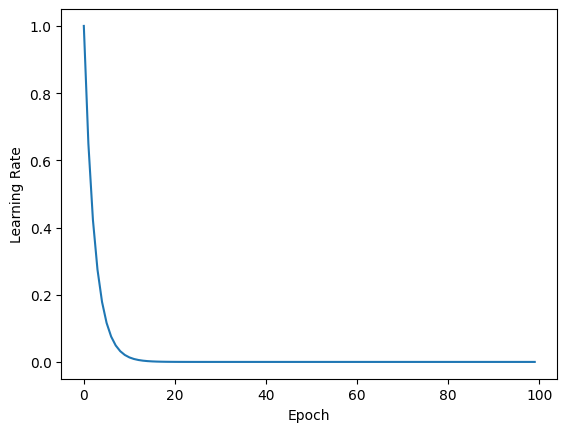

In [5]:
plt.plot(lrs)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
# plt.savefig("ExponentialDecayingLearningRate.svg")
plt.show()

## 3/ What about a more complex Learning rate scheduler

But we don't want a constant learning rate. Let's create a scheduler object.

In [6]:
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=1, step_size_up=5, mode="triangular2")
lrs = []


for epoch in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()


### Save Figure

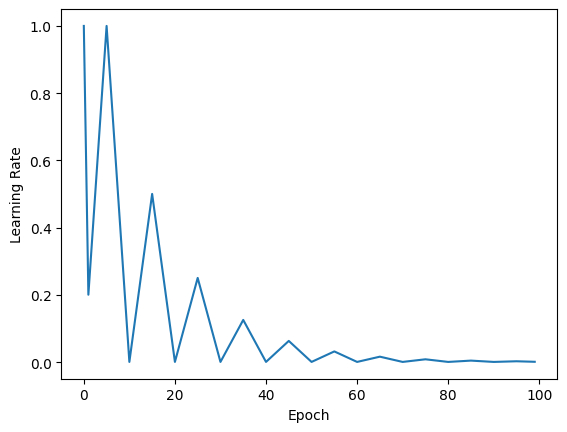

In [7]:
plt.plot(lrs)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
# plt.savefig("CyclicDecayingLearningRate.svg")
plt.show()

Now follow this to incorporate a learning scheduler in your own Neural Networks!